**Data Collection**

In this part we will use beautifulsoup package to scrape two book from Gutenberg 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
def get_whole_content(url):
  f = open(url,'r')
  str = f.read()
  f.close()
  return str

In [4]:
#get the url of book
url1 = '/content/drive/MyDrive/three book/Nausea.txt'
url2 = '/content/drive/MyDrive/three book/The Brothers Karamazov.txt'
url3 = '/content/drive/MyDrive/three book/Thus Spake Zarathustra A Book for All and None by Friedrich Wilhelm Nietzsche.txt'
#get the data
book1 = get_whole_content(url1)
book2 = get_whole_content(url2)
book3 = get_whole_content(url3)

In [6]:
import re
import pandas as pd
import numpy as np

def part2():
  content1 = re.split('THE END',book2)
  content = re.split('Contents',content1[0])
  chapter = re.split('Chapter [A-Z]+.',content[1])
  Contents = []
  for i in chapter:
    if len(i) >150:
      Contents.append(i)
  df = pd.DataFrame(columns=['Author','Chapter','Content'])
  for i in range(len(Contents)):
    author_n = 'Fyodor Dostoyevsky'
    t_content = Contents[i].split('\n')
    chap_n = t_content[1]
    doc=''
    for x in t_content[2:]:
      doc += x

    df.loc[i,'Author'] = author_n
    df.loc[i,'Chapter'] = chap_n
    df.loc[i,'Content'] = doc
  return df
df2 = part2() 
df2 

,Author,Chapter,Content
0,Fyodor Dostoyevsky,Fyodor Pavlovitch Karamazov,Alexey Fyodorovitch Karamazov was the third so...
1,Fyodor Dostoyevsky,He Gets Rid Of His Eldest Son,You can easily imagine what a father such a ma...
2,Fyodor Dostoyevsky,The Second Marriage And The Second Family,Very shortly after getting his four‐year‐old M...
3,Fyodor Dostoyevsky,"The Third Son, Alyosha","He was only twenty, his brother Ivan was in hi..."
4,Fyodor Dostoyevsky,Elders,Some of my readers may imagine that my young m...
...,...,...,...
91,Fyodor Dostoyevsky,A Corrupter Of Thought,“It’s not only the accumulation of facts that ...
92,Fyodor Dostoyevsky,The Peasants Stand Firm,This was how Fetyukovitch concluded his speech...
93,Fyodor Dostoyevsky,Plans For Mitya’s Escape,"Very early, at nine o’clock in the morning, fi..."
94,Fyodor Dostoyevsky,For A Moment The Lie Becomes Truth,He hurried to the hospital where Mitya was lyi...


In [7]:
def part3():
  content1 = re.split('APPENDIX',book3)
  content = re.split('[A-Z]* PART',content1[1])
  df_t = pd.DataFrame(columns=['Author','Chapter','Content'])
  for j in range(1,5):
    chapter = re.split('\n[A-Z]+\.',content[4]) 
    Contents = []
    for i in chapter:
      if len(i) >40:
        Contents.append(i)

    df = pd.DataFrame(columns=['Author','Chapter','Content'])
    doc = ''
    for i in range(len(Contents)):
      t_content = Contents[i].split('\n')
      author_n = 'Friedrich Nietzsche'
      if len(t_content[0]) < 40:
        doc=''
        chap_n = t_content[0]
        for x in t_content[1:]:
          doc += x
        df.loc[i,'Author'] = author_n
        df.loc[i,'Chapter'] = chap_n
        df.loc[i,'Content'] = doc 

    df.loc[0,'Chapter'] = 'INTRO FOR PART'

    for i in range(len(df)):
      if len(df.loc[i,'Chapter'])<5:
        df.loc[i-1,'Content'] += df.loc[i,'Content']
        df.drop(i,axis=0,inplace=True)

    df_t = df_t.append(df)
  return df_t
df3 = part3()
df3

,Author,Chapter,Content
0,Friedrich Nietzsche,INTRO FOR PART,"Ah, where in the world have there been greater..."
1,Friedrich Nietzsche,THE HONEY SACRIFICE.,--And again passed moons and years over Zarath...
2,Friedrich Nietzsche,THE CRY OF DISTRESS.,The next day sat Zarathustra again on the ston...
3,Friedrich Nietzsche,TALK WITH THE KINGS.,1.Ere Zarathustra had been an hour on his way ...
4,Friedrich Nietzsche,THE LEECH.,"And Zarathustra went thoughtfully on, further ..."
...,...,...,...
18,Friedrich Nietzsche,AMONG DAUGHTERS OF THE DESERT.,1.“Go not away!” said then the wanderer who ca...
19,Friedrich Nietzsche,THE AWAKENING.,"1.After the song of the wanderer and shadow, t..."
20,Friedrich Nietzsche,THE ASS-FESTIVAL.,"1.At this place in the litany, however, Zarath..."
21,Friedrich Nietzsche,THE DRUNKEN SONG.,1.Meanwhile one after another had gone out int...


In [8]:
def part1():
  content1 = re.split('UNDATED PAGES',book1)
  content =  re.split('\bMonday|Tuesday|Wednesday|Thursday|Friday|Saturday:',content1[1])

  df = pd.DataFrame(columns=['Author','Chapter','Content'])
  for i in range(len(content)):
    author_n = 'Jean-Paul Sartre'
    if i%6 == 0:
      chap_n = 'Monday'
    if i%6 == 1:
      chap_n = 'Tuesday'
    if i%6 == 2:
      chap_n = 'Wednesday'
    if i%6 == 3:
      chap_n = 'Thursday'
    if i%6 == 4:
      chap_n = 'Friday'
    if i%6 == 5:
      chap_n = 'Saturaday'
    doc = content[i]
    df.loc[i,'Author'] = author_n
    df.loc[i,'Chapter'] = chap_n
    df.loc[i,'Content'] = doc 

  for i in range(len(df)):
    if len(df.loc[i,'Content']) < 100:
      #df.loc[i-1,'Content'] += df.loc[i,'Content']
      df.drop(i,axis=0,inplace=True)
  return df

df1 = part1()
df1

,Author,Chapter,Content
0,Jean-Paul Sartre,Monday,\n\nThe best thing would be to write down even...
1,Jean-Paul Sartre,Tuesday,", 30 January: Nothing new.\nI worked from nine..."
2,Jean-Paul Sartre,Wednesday,"morning in the library:\nA little while ago, ..."
3,Jean-Paul Sartre,Thursday,"afternoon:\n""M. de Rollebon was quite ugly. Q..."
4,Jean-Paul Sartre,Friday,evening: I had worked all day in the Mazarine...
5,Jean-Paul Sartre,Saturaday,:\n\nThree o'clock. Three o'clock is always to...
6,Jean-Paul Sartre,Monday,", 11.30\nI have worked two hours in the readin..."
7,Jean-Paul Sartre,Tuesday,", 3.00 -p.m.\nA little more and I would have f..."
9,Jean-Paul Sartre,Thursday,". April, May, June. \n1924, 1925, 1926.\nThat'..."
12,Jean-Paul Sartre,Monday,", you know because of the . . .""\nShe sketches..."


In [9]:
df = pd.DataFrame(columns=['Author','Chapter','Content'])
df = df.append(df1)
df = df.append(df2)
df = df.append(df3)

df

,Author,Chapter,Content
0,Jean-Paul Sartre,Monday,\n\nThe best thing would be to write down even...
1,Jean-Paul Sartre,Tuesday,", 30 January: Nothing new.\nI worked from nine..."
2,Jean-Paul Sartre,Wednesday,"morning in the library:\nA little while ago, ..."
3,Jean-Paul Sartre,Thursday,"afternoon:\n""M. de Rollebon was quite ugly. Q..."
4,Jean-Paul Sartre,Friday,evening: I had worked all day in the Mazarine...
...,...,...,...
18,Friedrich Nietzsche,AMONG DAUGHTERS OF THE DESERT.,1.“Go not away!” said then the wanderer who ca...
19,Friedrich Nietzsche,THE AWAKENING.,"1.After the song of the wanderer and shadow, t..."
20,Friedrich Nietzsche,THE ASS-FESTIVAL.,"1.At this place in the litany, however, Zarath..."
21,Friedrich Nietzsche,THE DRUNKEN SONG.,1.Meanwhile one after another had gone out int...


**Data Processing**

We should do some text cleaning before we use classification method

In [10]:
import nltk
nltk.download('punkt')
import random
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words("english")
from nltk.tokenize import RegexpTokenizer
import pandas as pd

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [11]:
from gensim import utils
import gensim.parsing.preprocessing as gsp
#get rid of tags,punctuation and something else
filters = [
           gsp.strip_tags, 
           gsp.strip_punctuation,
           gsp.strip_multiple_whitespaces,
           gsp.strip_numeric,
           gsp.remove_stopwords, 
           gsp.strip_short, 
           gsp.stem_text
          ]

def clean_text(s):
    s = s.lower()
    s = utils.to_unicode(s)
    for f in filters:
        s = f(s)
    return s

In [14]:
#creat segments
def Split_content(df):
  df_h =  pd.DataFrame(columns=['Author','Chapter','Content'])
  len_text = 100
  index_n = 1
  for i in range(len(df)):
    text = df.iloc[i]['Content']
    text_words = clean_text(text).split(' ')
    doc = ''
    if len(text_words)%len_text != 0:
      slice_number = len(text_words)//len_text+1
      for j in range(slice_number):
        if j < slice_number-1: 
          df_w = pd.DataFrame(columns=['Author','Chapter','Content'])
          doc = ' '.join(text_words[j*len_text:(j+1)*len_text])
          df_w.loc[index_n,'Author']=  gsp.strip_punctuation(df.iloc[i]['Author'])
          df_w.loc[index_n,'Chapter']= gsp.strip_multiple_whitespaces(df.iloc[i]['Chapter'])
          df_w.loc[index_n,'Content']= doc
          df_h = df_h.append(df_w)
          index_n += 1
          doc = ''
        else:
          df_w = pd.DataFrame(columns=['Author','Chapter','Content'])
          doc = ' '.join(text_words[j*len_text:(j+1)*len_text])
          df_w.loc[index_n,'Author']= gsp.strip_punctuation(df.iloc[i]['Author'])
          df_w.loc[index_n,'Chapter']= gsp.strip_multiple_whitespaces(df.iloc[i]['Chapter'])
          df_w.loc[index_n,'Content']= doc
          index_n += 1
          doc = ''
          df_h = df_h.append(df_w)
  return df_h

In [15]:
df_h = Split_content(df)
df_h

,Author,Chapter,Content
1,Jean Paul Sartre,Monday,best thing write event dai dai diari clearly—l...
2,Jean Paul Sartre,Monday,probabl look somewhat foolish absent mind chil...
3,Jean Paul Sartre,Monday,corner boulevard victor noir pari train come p...
4,Jean Paul Sartre,Monday,think cure tramwai number seven abattoir grand...
5,Jean Paul Sartre,Monday,wai have pick know littl ago come room stop sh...
...,...,...,...
2318,Friedrich Nietzsche,THE SIGN.,morn night zarathustra jump fromhi couch have ...
2319,Friedrich Nietzsche,THE SIGN.,honoureth sun eagl talonsdoth grasp new light ...
2320,Friedrich Nietzsche,THE SIGN.,knee unwil toleav love like dog findeth oldmas...
2321,Friedrich Nietzsche,THE SIGN.,zarathustra androar wildli sprang cave higher ...


doc2vec

In [16]:
import gensim
#tagged text
TaggededDocument = gensim.models.doc2vec.TaggedDocument
tagged_x = [TaggededDocument(row.split(' '),tags = [df_h.iloc[index]['Author'],df_h.iloc[index]['Chapter']]) for index, row in enumerate(df_h['Content'])]


In [17]:
from sklearn import utils as skl_utils
from tqdm import tqdm
#build doc2vec model
transform_model = gensim.models.doc2vec.Doc2Vec(vector_size=50, min_count=2, epochs=40)
transform_model.build_vocab(tagged_x)
transform_model.train(skl_utils.shuffle([x for x in tqdm(tagged_x)]), total_examples=len(tagged_x), epochs=transform_model.epochs)

100%|██████████| 2322/2322 [00:00<00:00, 676378.49it/s]


In [ ]:
#a test of model
doc = 'love is the highest thing in the world'
text_words = nltk.word_tokenize(doc)
text_words = [w for w in text_words if (w.lower() not in stop_words) and (w.isdigit() or w.isalpha())]
vector = transform_model.infer_vector(text_words)
print(vector)
sims = transform_model.docvecs.most_similar([vector],topn=10)
print(sims)

[-0.38824818 -0.12672172  0.06763523 -0.10886025  0.21384789 -0.27123183
  0.07798726  0.11927627  0.04376328  0.07013655  0.21715838 -0.10025468
 -0.21310377  0.02976431  0.14566295  0.29974136  0.1434379   0.07625125
 -0.15684752 -0.34291723  0.0144657   0.06582602  0.02696737 -0.1878433
 -0.04912265  0.0479349   0.2902262   0.14642313 -0.02399497  0.01059214
  0.32564875 -0.03391669  0.11063027 -0.43590325 -0.17207263  0.06569102
 -0.48120216 -0.1871656   0.01413401  0.02409418  0.25683495  0.00482056
  0.09916254  0.15754308  0.1655978  -0.1637756  -0.02969496  0.13101393
 -0.3511236   0.13368583]
[('Fyodor Dostoyevsky', 0.5665435791015625), ('THE SEVEN SEALS', 0.49864912033081055), (' By Friedrich Nietzsche ', 0.4836173355579376), ('THE NIGHT-SONG', 0.3192007839679718), ('THE SPIRIT OF GRAVITY', 0.29546937346458435), ('NEIGHBOUR-LOVE', 0.2869831919670105), ('THE CHILD WITH THE MIRROR', 0.28361088037490845), (' “I Am Coming, Too!”', 0.26124265789985657), ('THE THREE EVIL THINGS', 0

**XGBoost model**

We will use XGBoost method to do our classification

In [18]:
!pip install XGBoost

In [23]:
#Train test spilt
from sklearn.model_selection import train_test_split,cross_val_score
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer
#We can use author name as label, this is binary classification; or we can use chapter name as label, this will be multi-class classification
def split(df):
  X = df['Content']
  y = df[['Author']].values.ravel()
  X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42, stratify = y)
  return X_train,X_test,y_train,y_test

X_train,X_test,y_train,y_test= split(df_h)

In [24]:
import xgboost as xgb
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
#build XGBoost model
X_train_BOW = np.asmatrix(np.array([transform_model.infer_vector(row.split()) for index, row in enumerate(X_train)]))
X_test_BOW = np.asmatrix(np.array([transform_model.infer_vector(row.split()) for index, row in enumerate(X_test)]))
#if we use binary classificaiton we should use the first objective
#objective ='binary:logistic'
#if we use multi-class classificaiton we should use the second objective
objective = 'multi:softmax'
model = xgb.XGBClassifier(max_depth=50, n_estimators=80, learning_rate=0.1, colsample_bytree=.7, gamma=0, reg_alpha=4, objective=objective, eta=0.3, silent=1, subsample=0.8)
model.fit(X_train_BOW, y_train) 
prediction = model.predict(X_test_BOW)
cm = confusion_matrix(y_test, prediction)
scores = cross_val_score(model, X_train_BOW, y_train, cv=5)
print(cm)  
print('Test Accuracy', accuracy_score(y_test, prediction))
print(classification_report(y_test, prediction))
print('Mean Accuracy of Cross Validation',scores.mean())  

[[104   2   0]
 [  0 295   0]
 [  0   0  64]]
Test Accuracy 0.9956989247311828
                     precision    recall  f1-score   support

Friedrich Nietzsche       1.00      0.98      0.99       106
 Fyodor Dostoyevsky       0.99      1.00      1.00       295
   Jean Paul Sartre       1.00      1.00      1.00        64

           accuracy                           1.00       465
          macro avg       1.00      0.99      1.00       465
       weighted avg       1.00      1.00      1.00       465

Mean Accuracy of Cross Validation 0.9924571776367271


SVM

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# we create an instance of SVM and fit out data.
clf = svm.SVC()
clf.fit(X_train_BOW, y_train)

prediction = clf.predict(X_test_BOW)
cm = confusion_matrix(y_test, prediction)  
scores = cross_val_score(clf, X_train, y_train, cv=5)
print(cm)  
print('Accuracy', accuracy_score(y_test, prediction))
print(classification_report(y_test, prediction))
print(scores.mean())

[[102   4   0]
 [  0 295   0]
 [  1   0  63]]
Accuracy 0.989247311827957
                     precision    recall  f1-score   support

Friedrich Nietzsche       0.99      0.96      0.98       106
 Fyodor Dostoyevsky       0.99      1.00      0.99       295
   Jean Paul Sartre       1.00      0.98      0.99        64

           accuracy                           0.99       465
          macro avg       0.99      0.98      0.99       465
       weighted avg       0.99      0.99      0.99       465

nan


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: could not convert string to float: 'benevol love brother lovei teacher know acquir hard toacquir dearli bought won slowli long labor wemust love occasion moment onecan love occasion wick brother ask bird forgiv sound senseless butit right like ocean flow blend atouch place set movement end earth itmai senseless beg forgiv bird bird behappi side—a littl happier anyway—and children allanim nobler it’ like ocean itel prai bird consum anall‐embrac love sort transport prai willforg sin treasur ecstasi senseless mayseem men friend prai god glad glad children birdsof heaven let sin men confound do fearnot wear awai work hinder accomplish “sin mighti wicked mighti evil environ ismighti'

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_va

Erorr Anlysis

In [26]:
#show misclassification
def show_error(X_test,y_test,prediction,label):
  error_text = []
  for i in range(len(X_test_BOW)):
    if y_test[i] != prediction[i] and y_test[i] == label:
      error_text.append(X_test.iloc[i])
  return error_text

In [27]:
#show the details of word frequency
def topwords(top,text_words):
  ## for vectorizer
  from sklearn import feature_extraction, manifold
  text_words = text_words.split(' ')
  lst_tokens = text_words
  if len(lst_tokens) > 50:
    fig, ax = plt.subplots(nrows=1, ncols=2)
    fig.suptitle("Most frequent words", fontsize=15)
        
    ## unigrams
    dic_words_freq = nltk.FreqDist(lst_tokens)
    dtf_uni = pd.DataFrame(dic_words_freq.most_common(), 
                          columns=["Word","Freq"])
    dtf_uni.set_index("Word").iloc[:top,:].sort_values(by="Freq").plot(
                      kind="barh", title="Unigrams", ax=ax[0], 
                      legend=False).grid(axis='x')
    ax[0].set(ylabel=None)
        
    ## bigrams
    dic_words_freq = nltk.FreqDist(nltk.ngrams(lst_tokens, 2))
    dtf_bi = pd.DataFrame(dic_words_freq.most_common(), 
                          columns=["Word","Freq"])
    dtf_bi["Word"] = dtf_bi["Word"].apply(lambda x: " ".join(
                      string for string in x) )
    dtf_bi.set_index("Word").iloc[:top,:].sort_values(by="Freq").plot(
                      kind="barh", title="Bigrams", ax=ax[1],
                      legend=False).grid(axis='x')
    ax[1].set(ylabel=None)
    plt.show()

In [29]:
#we can see the wrong misclassification text
error_1 = show_error(X_test,y_test,prediction,label = 'Fyodor Dostoyevsky')
error_2 = show_error(X_test,y_test,prediction,label = 'Friedrich Nietzsche')
error_3 = show_error(X_test,y_test,prediction,label = 'Jean Paul Sartre')

Tfidf transform 

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
#Build Tfidf model
tfidf_model = TfidfVectorizer().fit(X_train)
X_train_TFIDF = tfidf_model.transform(X_train)
X_test_TFIDF = tfidf_model.transform(X_test)

XGBoost model

In [37]:
import xgboost as xgb
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
#Build XGBoost model
#if we use binary classificaiton we should use the first objective
#objective ='binary:logistic'
#if we use multi-class classificaiton we should use the second objective
objective ='multi:softmax'
model = xgb.XGBClassifier(max_depth=50, n_estimators=80, learning_rate=0.1, colsample_bytree=.7, gamma=0, reg_alpha=4, objective=objective, eta=0.3, silent=1, subsample=0.8)
model.fit(X_train_TFIDF, y_train) 
prediction = model.predict(X_test_TFIDF)
cm = confusion_matrix(y_test, prediction)  
scores = cross_val_score(model, X_train_TFIDF, y_train, cv=5)
print(cm)  
print('Accuracy', accuracy_score(y_test, prediction))
print(classification_report(y_test, prediction))
print('Mean Accuracy of Cross Validation',scores.mean())  

[[106   0   0]
 [  0 293   2]
 [  0   6  58]]
Accuracy 0.9827956989247312
                     precision    recall  f1-score   support

Friedrich Nietzsche       1.00      1.00      1.00       106
 Fyodor Dostoyevsky       0.98      0.99      0.99       295
   Jean Paul Sartre       0.97      0.91      0.94        64

           accuracy                           0.98       465
          macro avg       0.98      0.97      0.97       465
       weighted avg       0.98      0.98      0.98       465

Mean Accuracy of Cross Validation 0.981153812711938


SVM

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# we create an instance of SVM and fit out data.
clf = svm.SVC()
clf.fit(X_train_TFIDF, y_train)

prediction = clf.predict(X_test_TFIDF)
cm = confusion_matrix(y_test, prediction)  
scores = cross_val_score(clf, X_train, y_train, cv=5)
print(cm)  
print('Accuracy', accuracy_score(y_test, prediction))
print(classification_report(y_test, prediction))
print(scores.mean())

[[106   0   0]
 [  0 295   0]
 [  0   8  56]]
Accuracy 0.9827956989247312
                     precision    recall  f1-score   support

Friedrich Nietzsche       1.00      1.00      1.00       106
 Fyodor Dostoyevsky       0.97      1.00      0.99       295
   Jean Paul Sartre       1.00      0.88      0.93        64

           accuracy                           0.98       465
          macro avg       0.99      0.96      0.97       465
       weighted avg       0.98      0.98      0.98       465

nan


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: could not convert string to float: 'benevol love brother lovei teacher know acquir hard toacquir dearli bought won slowli long labor wemust love occasion moment onecan love occasion wick brother ask bird forgiv sound senseless butit right like ocean flow blend atouch place set movement end earth itmai senseless beg forgiv bird bird behappi side—a littl happier anyway—and children allanim nobler it’ like ocean itel prai bird consum anall‐embrac love sort transport prai willforg sin treasur ecstasi senseless mayseem men friend prai god glad glad children birdsof heaven let sin men confound do fearnot wear awai work hinder accomplish “sin mighti wicked mighti evil environ ismighti'

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_va

Erorr Anlysis

In [ ]:
#we can see the wrong misclassification text
error_1 = show_error(X_test,y_test,prediction,label = 'Fyodor Dostoyevsky')
error_2 = show_error(X_test,y_test,prediction,label = 'Friedrich Nietzsche')
error_3 = show_error(X_test,y_test,prediction,label = 'Jean Paul Sartre')

Word cloud

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
  
from wordcloud import WordCloud

def plot_word_cloud(text):
    wordcloud_instance = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                stopwords=None,
                min_font_size = 10).generate(text) 
             
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud_instance) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.show()

In [ ]:
#word frequency for author Fyodor Dostoyevsky
texts = ''
for index, item in df1.iterrows():
    texts = texts + ' ' + clean_text(item['Content'])
    
plot_word_cloud(texts)

In [ ]:
#word frequency for author 'By Friedrich Nietzsche'
texts = ''
for index, item in df2.iterrows():
    texts = texts + ' ' + clean_text(item['Content'])
    
plot_word_cloud(texts)

Top words

30615


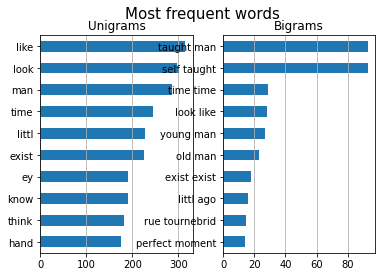

In [39]:
#top words for author book1
texts = ''
for index, item in df1.iterrows():
    texts = texts + ' ' + clean_text(item['Content'])

topwords(10,texts)

144564


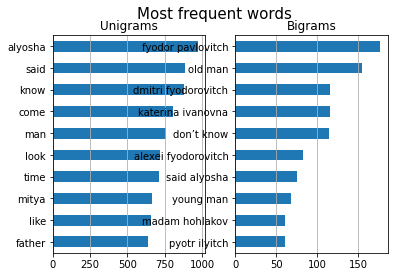

In [40]:
#top words for author book2
texts = ''
for index, item in df2.iterrows():
    texts = texts + ' ' + clean_text(item['Content'])

topwords(10,texts)

48333


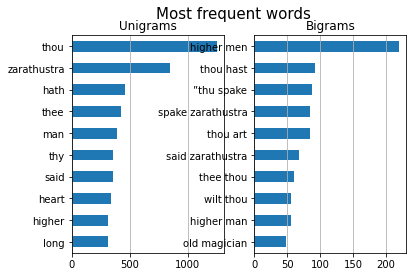

In [41]:
#top words for author book3
texts = ''
for index, item in df3.iterrows():
    texts = texts + ' ' + clean_text(item['Content'])

topwords(10,texts)

Clustering

In [53]:
def Clustering_model(X,df1,df2,n ,kmeans=True, HClustering= False, GMM =False):
  import matplotlib.pyplot as plt
  from itertools import cycle
  from sklearn.metrics import cohen_kappa_score
  from sklearn import metrics
  import numpy as np
  len1 = len(df1)
  len2 = len(df2)
  if kmeans == True:
    #k-means clustering
    from sklearn.cluster import KMeans
    kmeans = KMeans(n_clusters=n, random_state=0).fit(X)
    labels = kmeans.labels_
    cluster_centers = kmeans.cluster_centers_
    #print(cluster_centers)
    ##totall number of label
    labels_unique = np.unique(labels)
    ##numbers of label
    n_clusters_ = len(labels_unique)
    y_pred = kmeans.predict(X)
    print(y_pred)
    #calculate the labels
    y_true = np.array(y_pred)
    y_true[:len1] = np.argmax(np.bincount(y_true[:len1]))
    y_true[len1:len2] = np.argmax(np.bincount(y_true[len1:len2]))
    y_true[len2:] = np.argmax(np.bincount(y_true[len2:]))
    print(y_true)
    #Kappa Score
    Kappa = cohen_kappa_score(y_true, y_pred)
    print('Kmeans Kappa value: %0.4f' % Kappa)
    #silhouette score
    silihouette =metrics.silhouette_score(X, y_pred, metric='euclidean')
    print('Kmeans Silhoutte value: %0.4f' % silihouette)


  if HClustering == True:
    #Hierarchical Clustering
    from sklearn.cluster import AgglomerativeClustering
    ##setting Hierarchical Clustering
    linkages = ['ward', 'average', 'complete']
    n_clusters_ = n
    ac = AgglomerativeClustering(linkage=linkages[2],n_clusters = n_clusters_,affinity = 'euclidean')
    ##Train model
    y_pred = ac.fit_predict(X)
    print(y_pred)
    #calculate the labels
    y_true = np.array(y_pred)
    y_true[:len1] = np.argmax(np.bincount(y_true[:len1]))
    y_true[len1:len2] = np.argmax(np.bincount(y_true[len1:len2]))
    y_true[len2:] = np.argmax(np.bincount(y_true[len2:]))
    print(y_true)
    #Kappa Score
    Kappa = cohen_kappa_score(y_true, y_pred)
    print('Hclustering Kappa value: %0.4f' % Kappa)
    ##set labels
    lables = ac.labels_
    #silhouette score
    silhouette =metrics.silhouette_score(X, y_pred, metric='euclidean')
    print('Hclustering Silhouette value: %0.4f' % silhouette)

  if GMM == True:
    #GaussianMixtureModel
    ##设置gmm函数
    from sklearn.mixture import GaussianMixture
    gmm = GaussianMixture(n_components=n, covariance_type='spherical').fit(X)
    ##训练数据
    y_pred = gmm.predict(X)
    print(y_pred)
    #calculate labels
    y_true = np.array(y_pred)
    y_true[:len1] = np.argmax(np.bincount(y_true[:len1]))
    y_true[len1:len2] = np.argmax(np.bincount(y_true[len1:len2]))
    y_true[len2:] = np.argmax(np.bincount(y_true[len2:]))
    print(y_true)
    #Kappa Score
    Kappa = cohen_kappa_score(y_true, y_pred)
    print('GMM Kappa value: %0.4f' % Kappa)
    #silhouette score
    silhouette = metrics.silhouette_score(X, y_pred, metric='euclidean')
    print('GMM silhouette value: %0.4f' % silhouette)

In [52]:
#doc2vec clustering result
X = np.asmatrix(np.array([transform_model.infer_vector(row.split()) for index, row in enumerate(df_h['Content'])]))
clustering_result = Clustering_model(X,Split_content(df1),Split_content(df2),3,1,0,0) 
print(clustering_result)

[0 0 0 ... 2 2 2]
[0 0 0 ... 2 2 2]
Kmeans Kappa value: 0.7194
Kmeans Silhoutte value: 0.1905
None


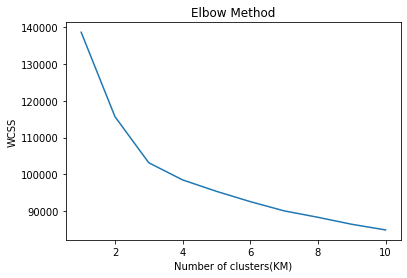

In [51]:
import matplotlib.pyplot as plt

#only for K-means
from sklearn.cluster import KMeans
wcss1 = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0).fit(X)
  kmeans.predict(X)
  wcss1.append(kmeans.inertia_)
  linkages = ['ward', 'average', 'complete']
plt.plot(range(1, 11), wcss1)
plt.title('Elbow Method')
plt.xlabel('Number of clusters(KM)')
plt.ylabel('WCSS')
plt.show()

In [55]:
#TFIDF clustering result
X = tfidf_model.transform(df_h['Content']).toarray()
clustering_result = Clustering_model(X,Split_content(df1),Split_content(df2),3,1,0,0)
print(clustering_result)

[2 2 2 ... 2 2 0]
[2 2 2 ... 2 2 2]
Kmeans Kappa value: 0.2855
Kmeans Silhoutte value: 0.0104
None


LSI and LDA model

In [56]:
from gensim import corpora
from gensim.models import LsiModel
from gensim.models.ldamodel import LdaModel

In [57]:
dic_text = []
for i in range(len(df)):
  text = df.iloc[i]['Content']
  text_words = clean_text(text).split(' ')
  dic_text.append(text_words)

print(dic_text)

[['best', 'thing', 'write', 'event', 'dai', 'dai', 'diari', 'clearly—let', 'nuanc', 'small', 'happen', 'escap', 'mean', 'classifi', 'tell', 'tabl', 'street', 'peopl', 'packet', 'tobacco', 'thing', 'chang', 'determin', 'exact', 'extent', 'natur', 'chang', 'instanc', 'cardboard', 'box', 'hold', 'bottl', 'ink', 'try', 'tell', 'saw', 'parallelopip', 'rectangl', 'opens—that', 'stupid', 'avoid', 'strang', 'think', 'big', 'danger', 'keep', 'diari', 'exagger', 'continu', 'forc', 'truth', 'look', 'hand', 'certain', 'minut', 'next—and', 'precis', 'propo', 'box', 'object', 'word', 'left', 'recaptur', 'impress', 'dai', 'yesterdai', 'readi', 'slip', 'finger', 'carefulli', 'note', 'happen', 'natur', 'write', 'definit', 'saturdai', 'dai', 'yesterdai', 'busi', 'far', 'thing', 'case', 'ordinarili', 'call', 'event', 'saturdai', 'children', 'plai', 'duck', 'drake', 'like', 'want', 'throw', 'stone', 'sea', 'moment', 'stop', 'drop', 'stone', 'left', 'probabl', 'look', 'somewhat', 'foolish', 'absent', 'mind

In [58]:
dictionary = corpora.Dictionary(dic_text)
# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in dic_text]

In [65]:
from gensim.models.coherencemodel import CoherenceModel

start,stop,step = 2,10,1
def generate_plot(start,stop,step,LSI = True, LDA = False):
  coherence_values = []
  model_list = []
  for num_of_topics in range(start, stop, step):
    if LSI == True:
      # generate LSA model
      model = LsiModel(doc_term_matrix, num_topics=num_of_topics, id2word = dictionary)  # train model
    if LDA == True:
      model = LdaModel(doc_term_matrix, num_topics=num_of_topics)
    model_list.append(model)
    coherencemodel = CoherenceModel(model=model, texts=dic_text, dictionary=dictionary, coherence='c_v')
    coherence_values.append(coherencemodel.get_coherence())
      # Show graph
  x = range(start, stop, step)
  plt.plot(x, coherence_values)
  plt.xlabel("Number of Topics")
  plt.ylabel("Coherence score")
  plt.legend(("coherence_values"), loc='best')
  plt.show()

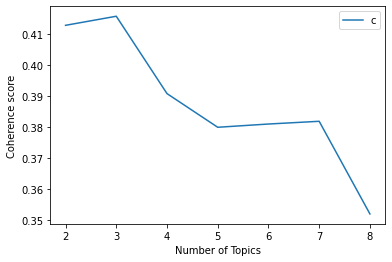

In [66]:
generate_plot(2,9,1,1,0)

In [68]:
def topics(number_of_topics,words,LSI = True, LDA = False):
  if LSI == True:
    model = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)  # train model
  if LDA == True:
    model = LdaModel(doc_term_matrix, num_topics=number_of_topics)
  print(model.print_topics(num_topics=number_of_topics, num_words=words))

In [69]:
topics(3,10,1,0)

[(0, '0.239*"man" + 0.201*"look" + 0.201*"like" + 0.199*"know" + 0.180*"said" + 0.176*"come" + 0.170*"time" + 0.143*"alyosha" + 0.132*"love" + 0.127*"hand"'), (1, '-0.675*"thou" + -0.263*"zarathustra" + -0.233*"thee" + -0.167*"thy" + 0.133*"mitya" + 0.133*"alyosha" + -0.128*"hath" + -0.126*"man" + -0.119*"men" + -0.095*"higher"'), (2, '-0.351*"exist" + 0.250*"alyosha" + 0.210*"thou" + -0.180*"man" + 0.177*"mitya" + 0.164*"said" + 0.162*"don’t" + -0.148*"self" + 0.143*"it’" + 0.139*"ivan"')]
